<a href="https://colab.research.google.com/github/fxrdhan/Machine-Learning-Project/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Firdaus_Arif_Ramadhani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Dataset Introduction**

**Air Quality Measurements Dataset**

1.  Description

    This dataset contains detailed air quality measurements collected over a specified period. It focuses on various pollutants, providing a comprehensive overview of air quality metrics.

2. Feature	Description

  - Date: The date of the measurement.
  - Time: The time of the measurement.
  - CO(GT): Concentration of carbon monoxide (CO) in the air (µg/m³).
  - PT08.S1(CO):	Sensor measurement for CO concentration.
  - NMHC(GT):	Concentration of non-methane hydrocarbons (NMHC) (µg/m³).
  - C6H6(GT):	Concentration of benzene (C6H6) in the air (µg/m³).
  - PT08.S2(NMHC):	Sensor measurement for NMHC concentration.
  - NOx(GT):	Concentration of nitrogen oxides (NOx) in the air (µg/m³).
  - PT08.S3(NOx):	Sensor measurement for NOx concentration.
  - NO2(GT):	Concentration of nitrogen dioxide (NO2) in the air (µg/m³).

  Missing Attribute Values
  - Some measurements may be recorded as -200, indicating missing or invalid data points.
3. Total Rows: 9357
4. Source: [Kaggle](https://www.kaggle.com/datasets/dakshbhalala/uci-air-quality-dataset/data)

# **2. Import Library**

In [540]:
!python --version

Python 3.10.12


In [541]:
!pip install pandas numpy matplotlib seaborn plotly scikit-learn yellowbrick scipy

In [542]:
# System and Settings
import time
import warnings
warnings.filterwarnings('ignore')

# Core Data Processing Libraries
import numpy as np
import pandas as pd
# Configure pandas display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning
## Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

## Clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

## Dimensionality Reduction
from sklearn.decomposition import PCA

## Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif

# Statistical Analysis
from scipy import stats
from scipy.stats.mstats import winsorize
from scipy.spatial.distance import cdist

# **3. Import Dataset**

In [543]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [544]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AirQualityUCI.csv")

In [545]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,3/10/2004,18:00:00,2.600,1360.000,150.000,11.900,1046.000,166.000,1056.000,113.000,1692.000,1268.000,13.600,48.900,0.758,NaN,NaN
1,3/10/2004,19:00:00,2.000,1292.000,112.000,9.400,955.000,103.000,1174.000,92.000,1559.000,972.000,13.300,47.700,0.726,NaN,NaN
2,3/10/2004,20:00:00,2.200,1402.000,88.000,9.000,939.000,131.000,1140.000,114.000,1555.000,1074.000,11.900,54.000,0.750,NaN,NaN
3,3/10/2004,21:00:00,2.200,1376.000,80.000,9.200,948.000,172.000,1092.000,122.000,1584.000,1203.000,11.000,60.000,0.787,NaN,NaN
4,3/10/2004,22:00:00,1.600,1272.000,51.000,6.500,836.000,131.000,1205.000,116.000,1490.000,1110.000,11.200,59.600,0.789,NaN,NaN


# **4. Exploratory Data Analysis (EDA)**

In [546]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [547]:
df.sample(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
3860,8/18/2004,14:00:00,-200.000,987.000,-200.000,5.400,782.000,-200.000,875.000,-200.000,1514.000,593.000,34.900,29.500,1.627,NaN,NaN
2443,6/20/2004,13:00:00,0.600,-200.000,-200.000,-200.000,-200.000,23.000,-200.000,36.000,-200.000,-200.000,-200.000,-200.000,-200.000,NaN,NaN
6809,12/19/2004,11:00:00,2.500,1077.000,-200.000,9.600,963.000,386.000,761.000,129.000,1081.000,1151.000,5.800,49.800,0.461,NaN,NaN
89,3/14/2004,11:00:00,2.800,1445.000,148.000,10.900,1009.000,176.000,878.000,114.000,1696.000,1355.000,16.900,46.100,0.879,NaN,NaN
3519,8/4/2004,9:00:00,-200.000,1113.000,-200.000,10.600,1001.000,-200.000,663.000,-200.000,1783.000,1146.000,29.900,42.100,1.747,NaN,NaN


In [548]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,0.000,0.000
mean,-34.208,1048.990,-159.090,1.866,894.595,168.617,794.990,58.149,1391.480,975.072,9.778,39.485,-6.838,NaN,NaN
std,77.657,329.833,139.789,41.380,342.333,257.434,321.994,126.940,467.210,456.938,43.204,51.216,38.977,NaN,NaN
min,-200.000,-200.000,-200.000,-200.000,-200.000,-200.000,-200.000,-200.000,-200.000,-200.000,-200.000,-200.000,-200.000,NaN,NaN
25%,0.600,921.000,-200.000,4.000,711.000,50.000,637.000,53.000,1185.000,700.000,10.900,34.100,0.692,NaN,NaN
50%,1.500,1053.000,-200.000,7.900,895.000,141.000,794.000,96.000,1446.000,942.000,17.200,48.600,0.977,NaN,NaN
75%,2.600,1221.000,-200.000,13.600,1105.000,284.000,960.000,133.000,1662.000,1255.000,24.100,61.900,1.296,NaN,NaN
max,11.900,2040.000,1189.000,63.700,2214.000,1479.000,2683.000,340.000,2775.000,2523.000,44.600,88.700,2.231,NaN,NaN


In [549]:
df.isnull().sum()

,0
Date,114
Time,114
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114


In [550]:
df.duplicated().sum()

113

In [551]:
df = df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)

In [552]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.columns.tolist()

['CO(GT)',
 'PT08.S1(CO)',
 'NMHC(GT)',
 'C6H6(GT)',
 'PT08.S2(NMHC)',
 'NOx(GT)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH',
 'AH']

In [553]:
# winsorization
for col in df.select_dtypes(include='number').columns:
    df[col] = winsorize(df[col], limits=[0.01, 0.01])

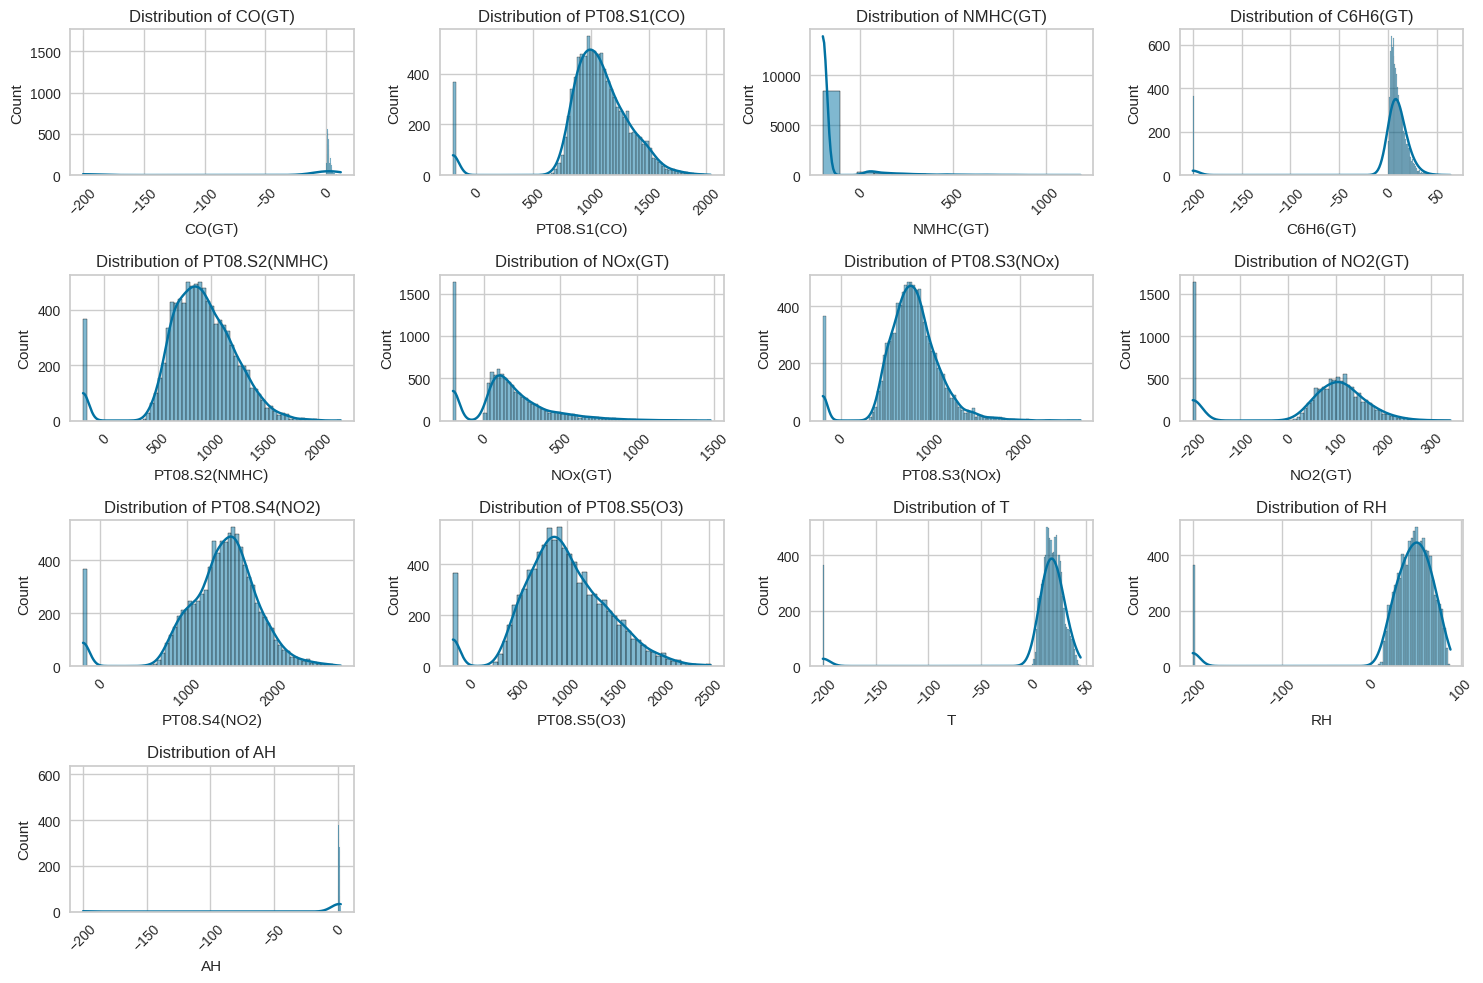

In [554]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_df, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**
- Most features show a right-skewed distribution.
- Features like T (Temperature), RH (Relative Humidity), and AH (Absolute Humidity) show a more symmetric distribution.

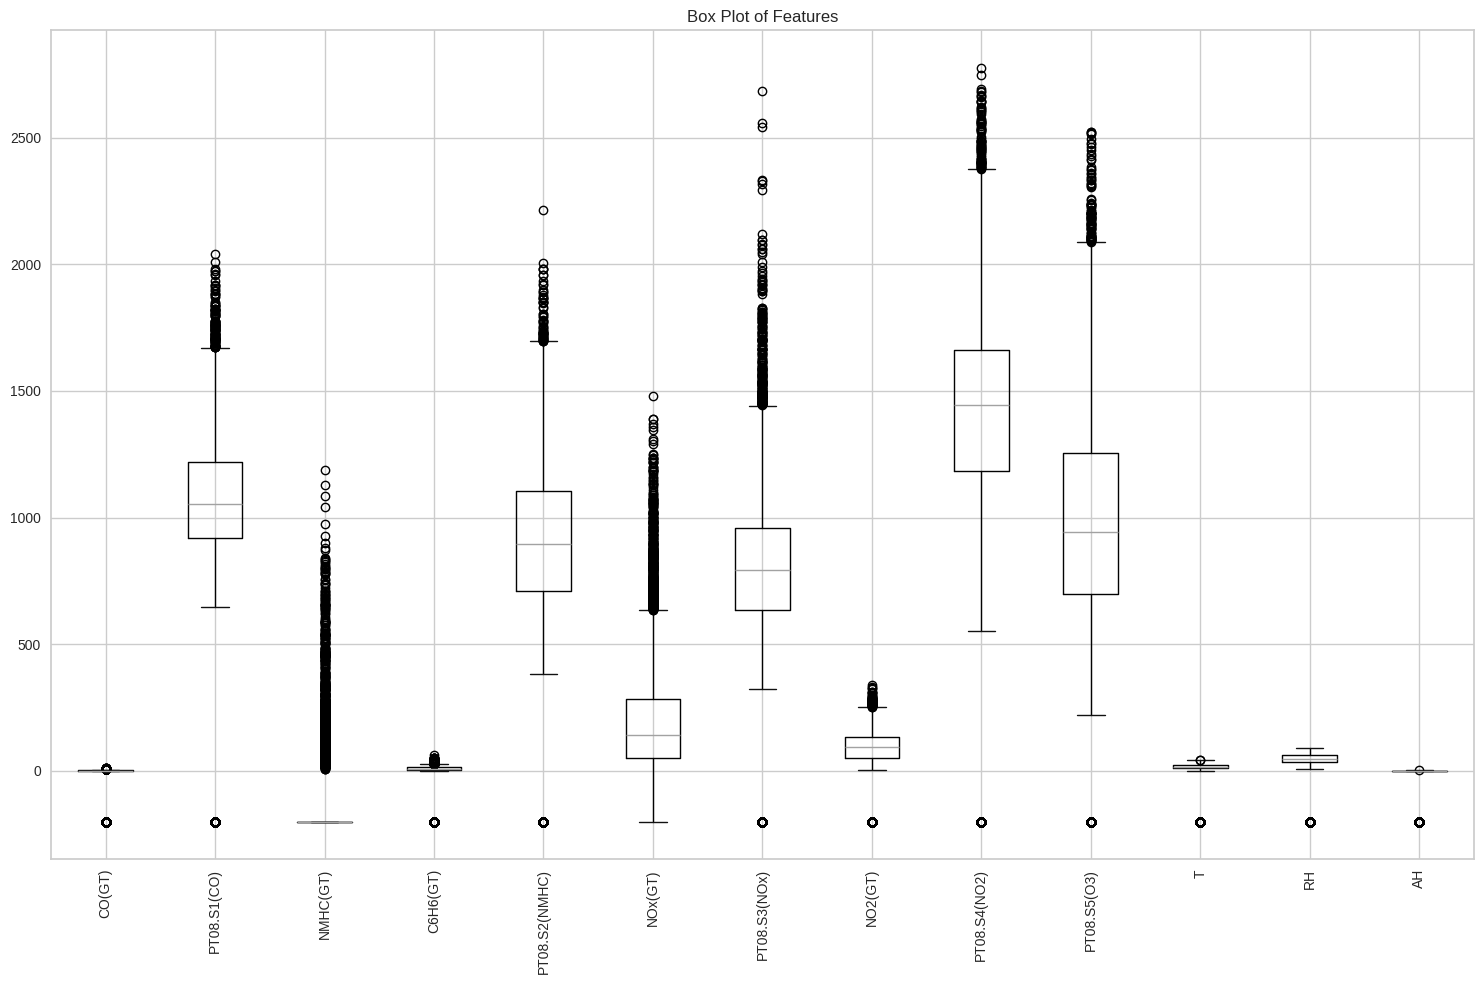

In [555]:
plt.figure(figsize=(15, 10))
df.boxplot()
plt.xticks(rotation=90)
plt.title('Box Plot of Features')
plt.tight_layout()
plt.show()

**Insight:**
- Several features, such as NMHC(GT) and NOx(GT), have significant outliers that are far from the interquartile range (IQR).
- Features like C6H6(GT) and CO(GT) have a wide spread, indicating substantial variability in the data.

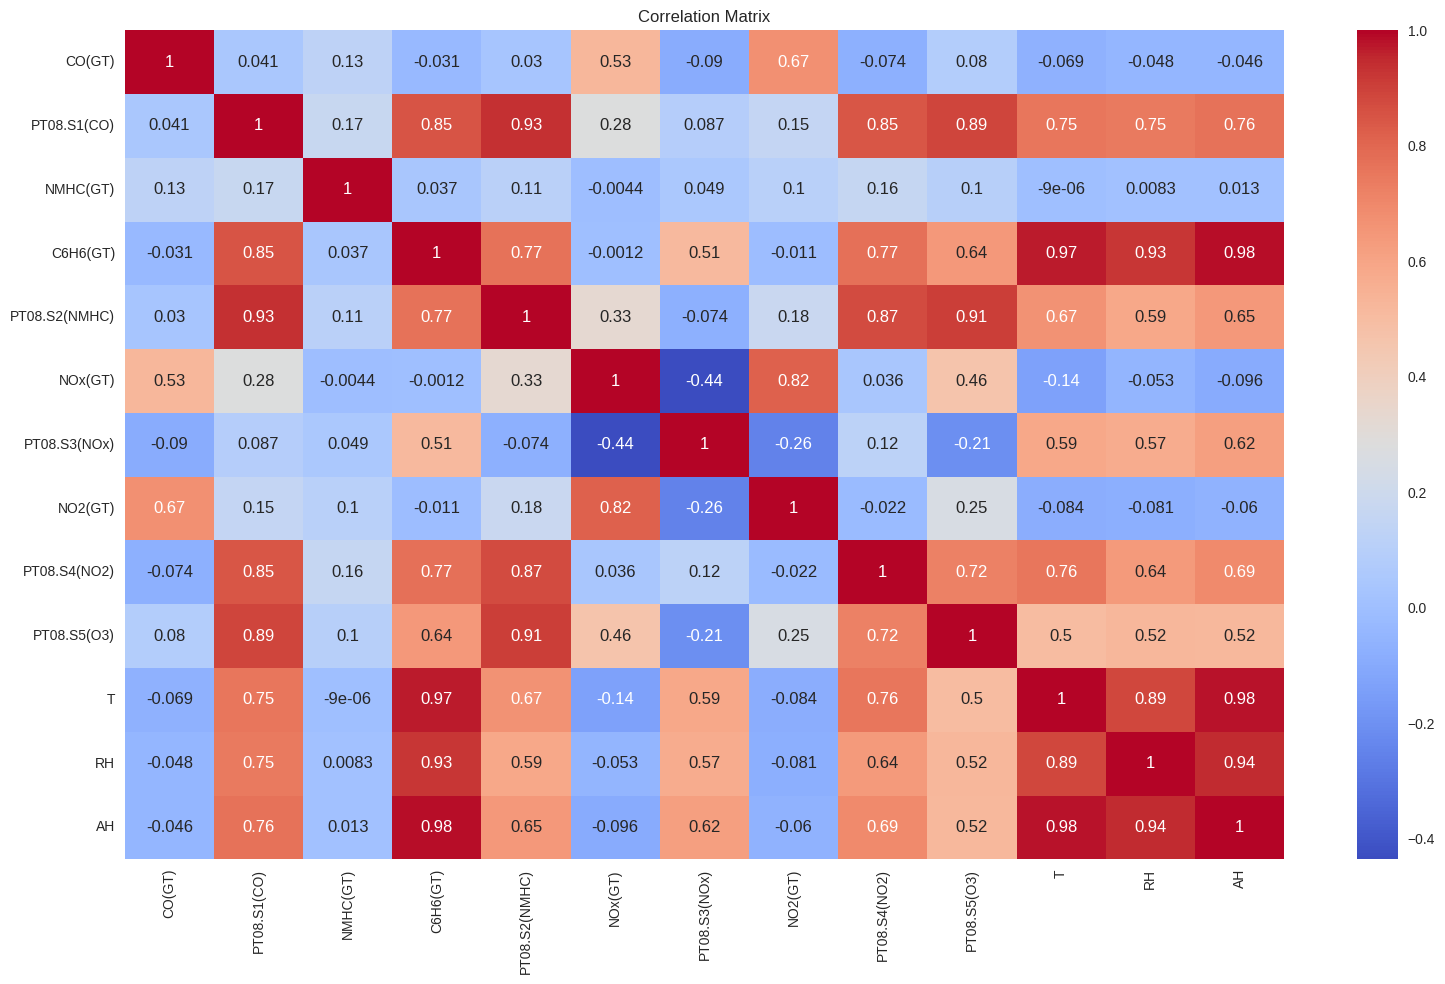

In [556]:
plt.figure(figsize=(16, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

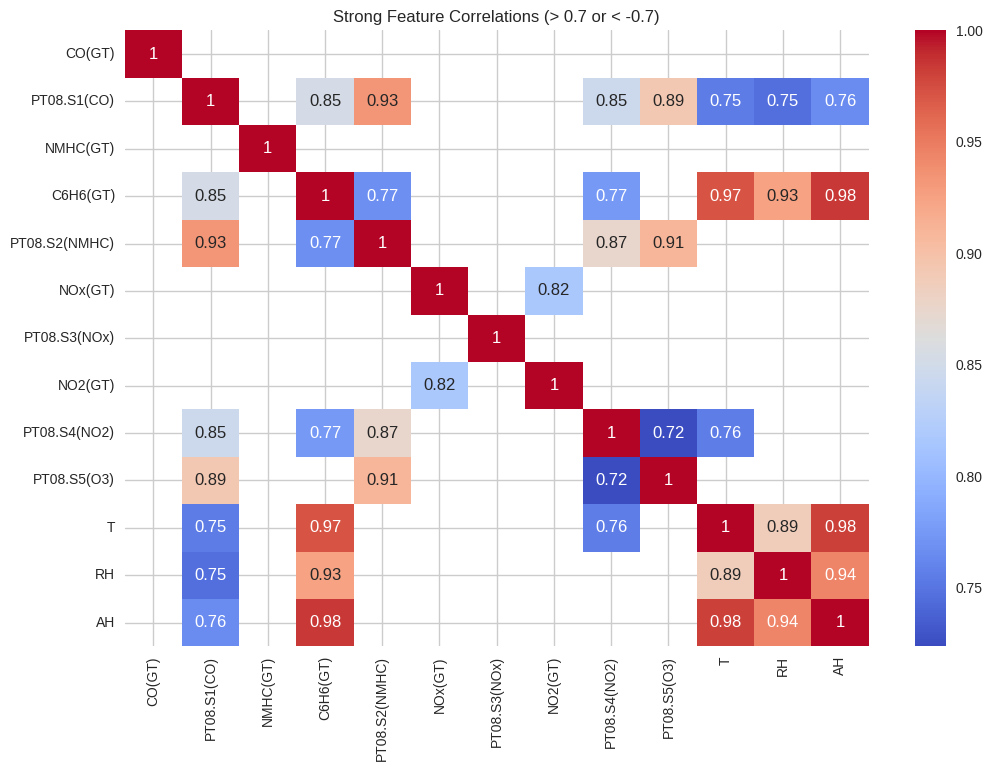

In [557]:
# Filter for strong correlations
correlation_matrix = numeric_df.corr()
strong_corr = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]

plt.figure(figsize=(12, 8))
sns.heatmap(strong_corr, annot=True, cmap='coolwarm', cbar=True)
plt.title('Strong Feature Correlations (> 0.7 or < -0.7)')
plt.show()

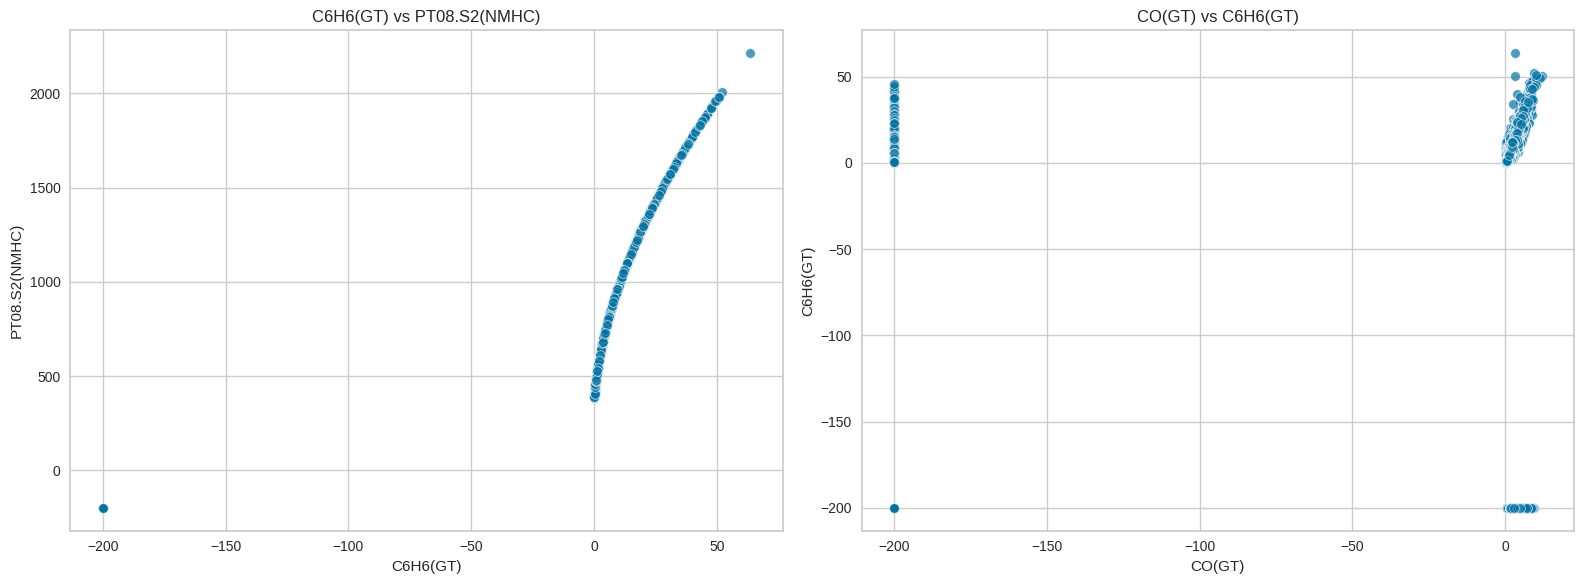

In [558]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# C6H6(GT) vs PT08.S2(NMHC)
sns.scatterplot(ax=axes[0], x='C6H6(GT)', y='PT08.S2(NMHC)', data=df, alpha=0.7)
axes[0].set_title('C6H6(GT) vs PT08.S2(NMHC)')
axes[0].set_xlabel('C6H6(GT)')
axes[0].set_ylabel('PT08.S2(NMHC)')

# CO(GT) vs C6H6(GT)
sns.scatterplot(ax=axes[1], x='CO(GT)', y='C6H6(GT)', data=df, alpha=0.7)
axes[1].set_title('CO(GT) vs C6H6(GT)')
axes[1].set_xlabel('CO(GT)')
axes[1].set_ylabel('C6H6(GT)')

plt.tight_layout()
plt.show()

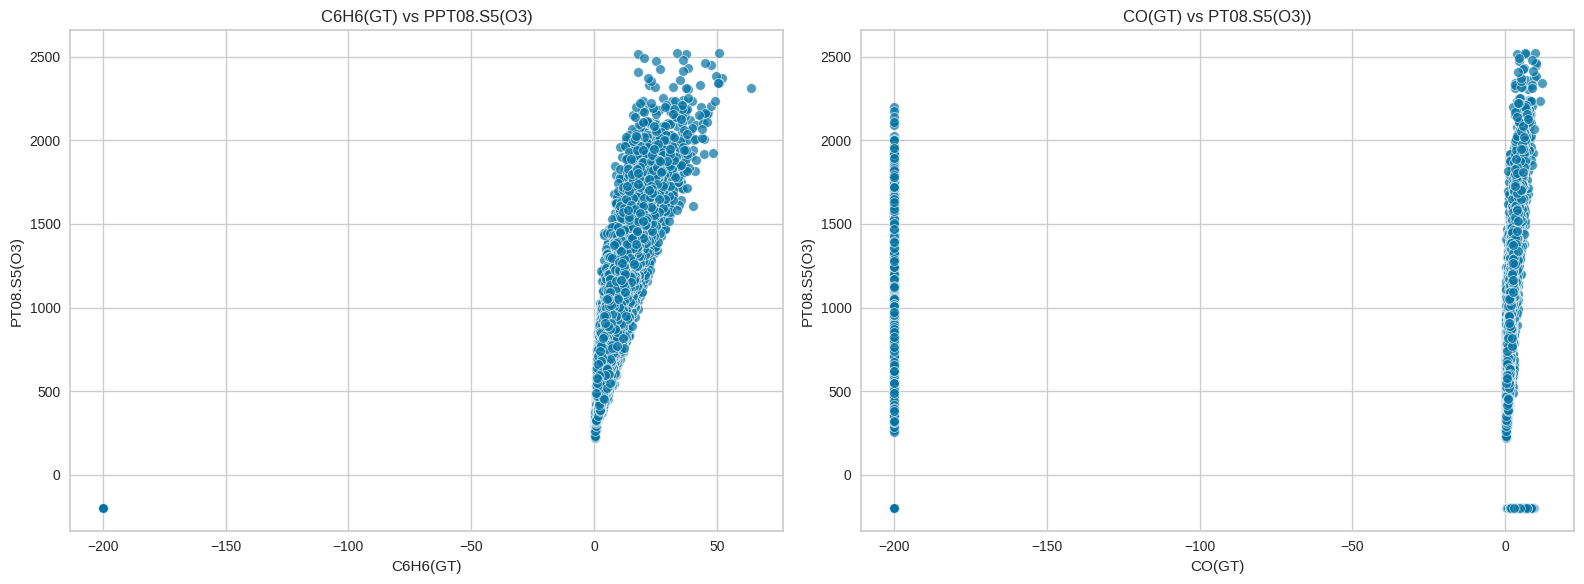

In [559]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# C6H6(GT) vs PT08.S5(O3)
sns.scatterplot(ax=axes[0], x='C6H6(GT)', y='PT08.S5(O3)', data=df, alpha=0.7)
axes[0].set_title('C6H6(GT) vs PPT08.S5(O3)')
axes[0].set_xlabel('C6H6(GT)')
axes[0].set_ylabel('PT08.S5(O3)')

# CO(GT) vs PT08.S5(O3)
sns.scatterplot(ax=axes[1], x='CO(GT)', y='PT08.S5(O3)', data=df, alpha=0.7)
axes[1].set_title('CO(GT) vs PT08.S5(O3))')
axes[1].set_xlabel('CO(GT)')
axes[1].set_ylabel('PT08.S5(O3)')

plt.tight_layout()
plt.show()

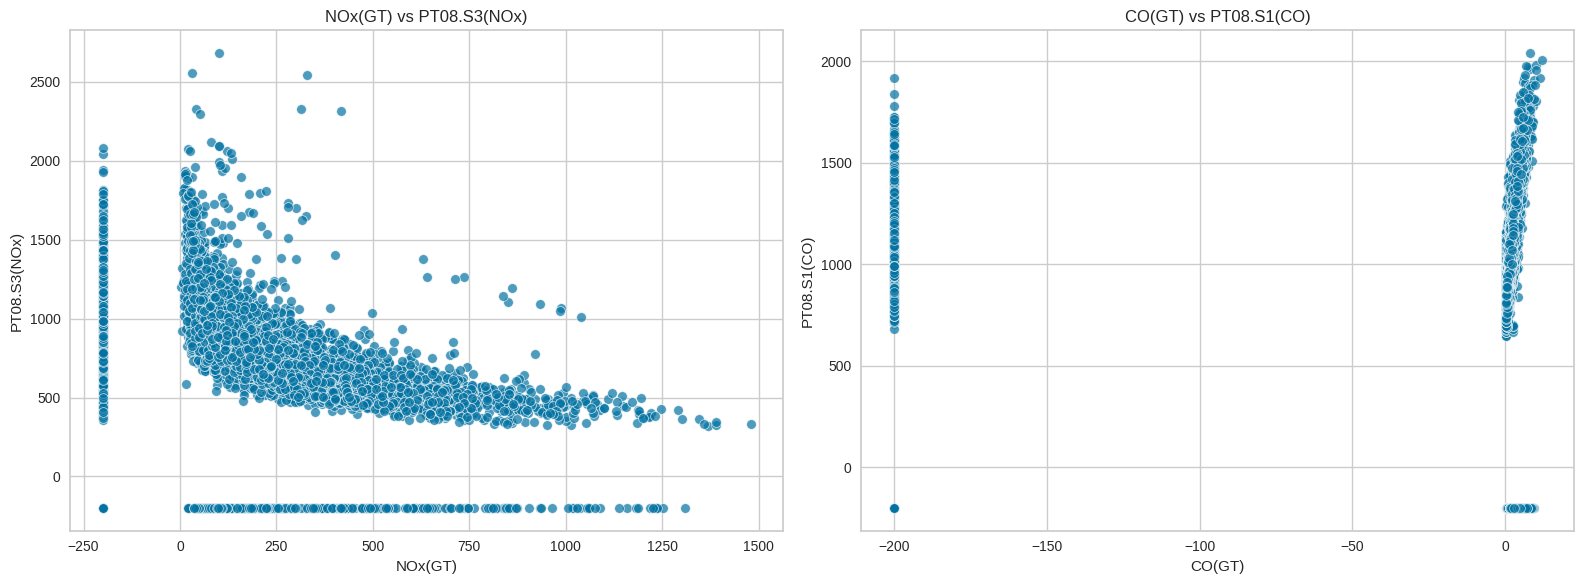

In [560]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# NOx(GT) vs PT08.S3(NOx)
sns.scatterplot(ax=axes[0], x='NOx(GT)', y='PT08.S3(NOx)', data=df, alpha=0.7)
axes[0].set_title('NOx(GT) vs PT08.S3(NOx)')
axes[0].set_xlabel('NOx(GT)')
axes[0].set_ylabel('PT08.S3(NOx)')

# CO(GT) vs PT08.S1(CO)
sns.scatterplot(ax=axes[1], x='CO(GT)', y='PT08.S1(CO)', data=df, alpha=0.7)
axes[1].set_title('CO(GT) vs PT08.S1(CO)')
axes[1].set_xlabel('CO(GT)')
axes[1].set_ylabel('PT08.S1(CO)')

plt.tight_layout()
plt.show()

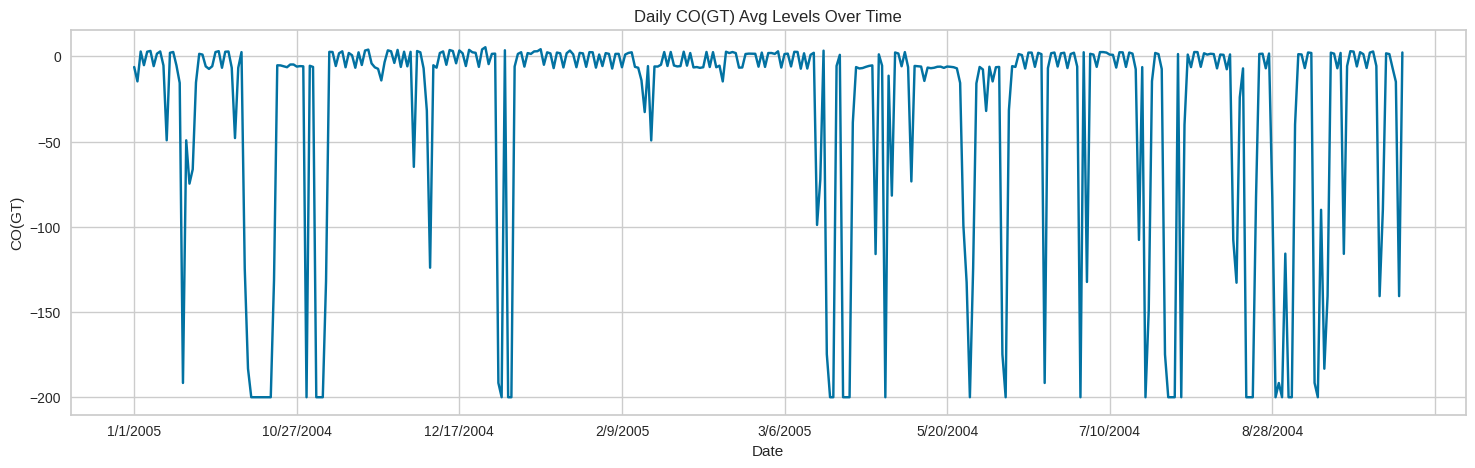

In [561]:
daily_avg = df.groupby('Date')['CO(GT)'].mean()

plt.figure(figsize=(18, 5))
daily_avg.plot(kind='line')
plt.title('Daily CO(GT) Avg Levels Over Time')
plt.xlabel('Date')
plt.ylabel('CO(GT)')
plt.grid(True)
plt.show()

# **5. Data Preprocessing**

## Remove Duplicated Rows & Missing Values

In [562]:
df.drop_duplicates(inplace=True)

In [563]:
df.dropna(inplace=True)

In [564]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


## Feature Engineering

In [565]:
# Create a new feature by combining 'CO(GT)' and 'PT08.S1(CO)'
df['CO_Product'] = df['CO(GT)'] * df['PT08.S1(CO)']
df['CO_Avg'] = (df['CO(GT)'] + df['PT08.S1(CO)']) / 2
df['CO_Ratio'] = df['CO(GT)'] / (df['PT08.S1(CO)'] + 1e-6)

df[['CO_Product', 'CO_Avg', 'CO_Ratio']].describe()

,CO_Product,CO_Avg,CO_Ratio
count,9357.000,9357.000,9357.000
mean,-34822.759,507.391,-0.030
std,82975.074,170.984,0.100
min,-383000.000,-200.000,-0.294
25%,395.000,439.150,0.001
50%,1414.500,512.850,0.001
75%,2957.800,601.500,0.002
max,40000.000,1024.000,1.000


In [566]:
# Create a new feature by combining 'NMHC(GT)' and 'PT08.S2(NMHC)'
df['NMHC_Product'] = df['NMHC(GT)'] * df['PT08.S2(NMHC)']
df['NMHC_Avg'] = (df['NMHC(GT)'] + df['PT08.S2(NMHC)']) / 2
df['NMHC_Ratio'] = df['NMHC(GT)'] / (df['PT08.S2(NMHC)'] + 1e-6)

df[['NMHC_Product', 'NMHC_Avg', 'NMHC_Ratio']].describe()

,NMHC_Product,NMHC_Avg,NMHC_Ratio
count,9357.000,9357.000,9357.000
mean,-137052.864,367.753,-0.148
std,171180.822,191.879,0.273
min,-442800.000,-200.000,-2.560
25%,-215000.000,264.500,-0.262
50%,-170800.000,358.000,-0.208
75%,-129400.000,470.500,-0.161
max,1946393.000,1413.000,1.000


In [567]:
# Total Polutan
df['Total_Polutan'] = df[['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']].sum(axis=1)

df['Total_Polutan'].describe()

,Total_Polutan
count,9357.000
mean,35.334
std,451.200
min,-1000.000
25%,-116.600
50%,74.200
75%,292.700
max,1739.000


In [568]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Extract temporal components
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour
df['DayOfWeek'] = df['Datetime'].dt.dayofweek  # Monday=0, Sunday=6
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)  # Binary feature: 1 for weekend, 0 for weekday

df[['Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'IsWeekend']].sample(5)

,Year,Month,Day,Hour,DayOfWeek,IsWeekend
8616,2005,3,4,18,4,0
1337,2004,5,5,11,2,0
8513,2005,2,28,11,0,0
3921,2004,8,21,3,5,1
1393,2004,5,7,19,4,0


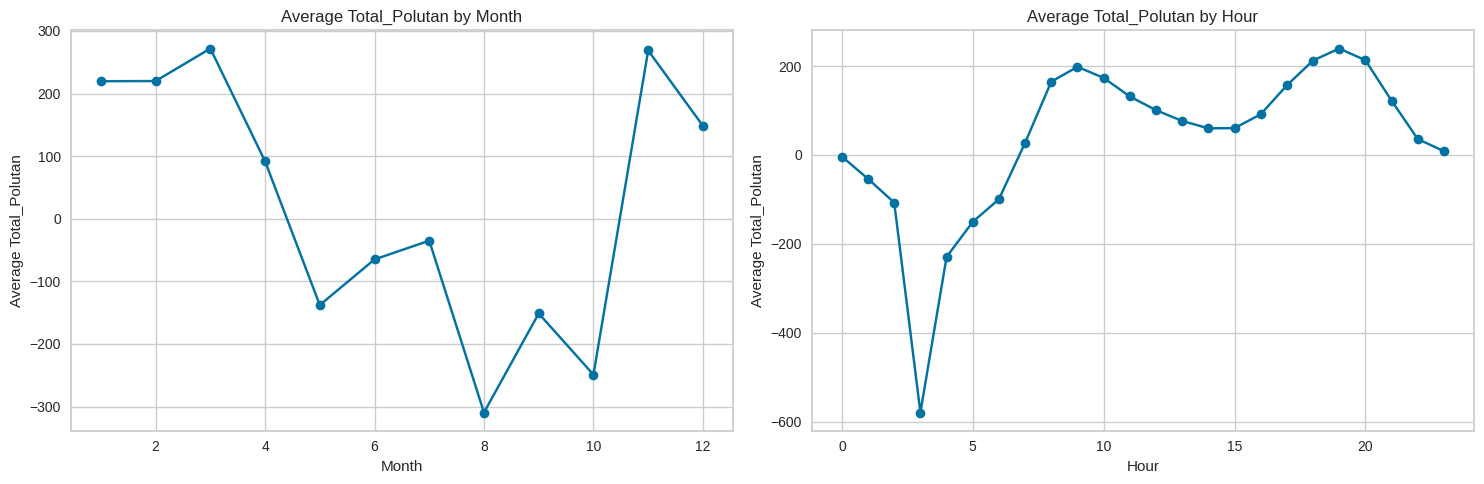

In [569]:
monthly_avg = df.groupby('Month')['Total_Polutan'].mean()
hourly_avg = df.groupby('Hour')['Total_Polutan'].mean()

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
monthly_avg.plot(kind='line', marker='o')
plt.title('Average Total_Polutan by Month')
plt.xlabel('Month')
plt.ylabel('Average Total_Polutan')
plt.grid(True)

plt.subplot(1, 2, 2)
hourly_avg.plot(kind='line', marker='o')
plt.title('Average Total_Polutan by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Total_Polutan')
plt.grid(True)

plt.tight_layout()
plt.show()

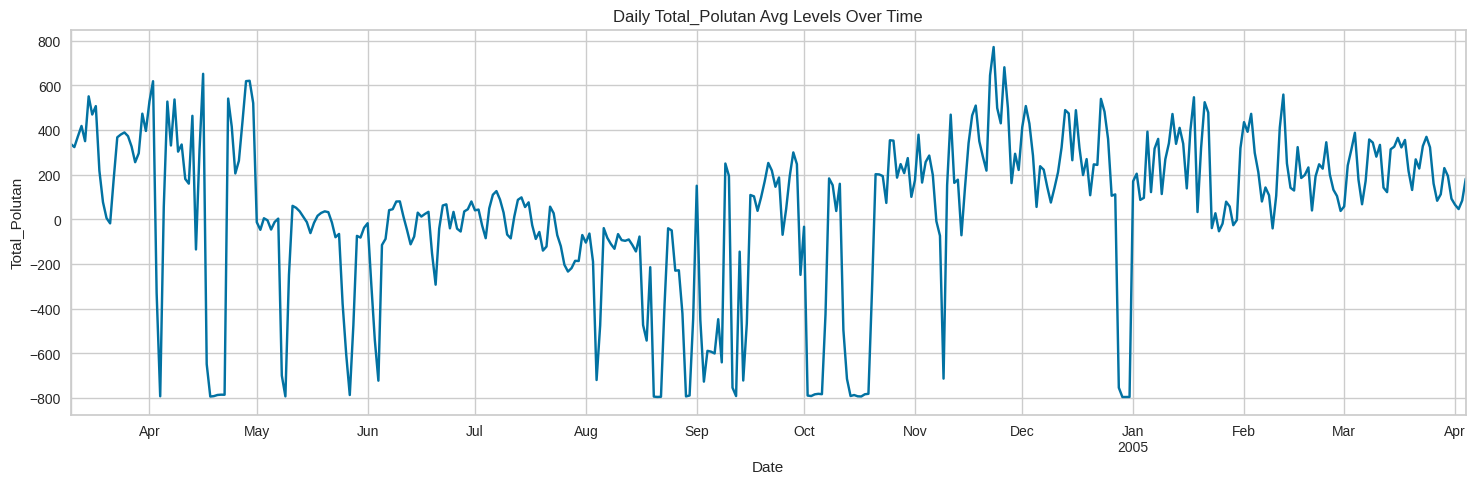

In [570]:
df['Date'] = pd.to_datetime(df['Date'])
daily_avg = df.groupby('Date')['Total_Polutan'].mean()

plt.figure(figsize=(18, 5))
daily_avg.plot(kind='line')
plt.title('Daily Total_Polutan Avg Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Total_Polutan')
plt.grid(True)
plt.show()

## Handle Outliers

In [571]:
# 1. Replace -200 with NaN
df = df.replace(-200, np.nan)

# 2. Linear interpolation for short gaps (3 periods)
df = df.interpolate(method='linear', limit=3)

# 3. Forward fill for medium gaps (6 periods)
df = df.fillna(method='ffill', limit=6)

# 4. Use seasonal mean for long gaps
df['hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
# Group by hour and calculate mean for each column separately
seasonal_mean = df.groupby('hour')[df.select_dtypes(include=[np.number]).columns].transform('mean')
df = df.fillna(value=seasonal_mean)
df = df.drop('hour', axis=1)

# 5. If any NaN remains, use backward fill
df = df.fillna(method='bfill')

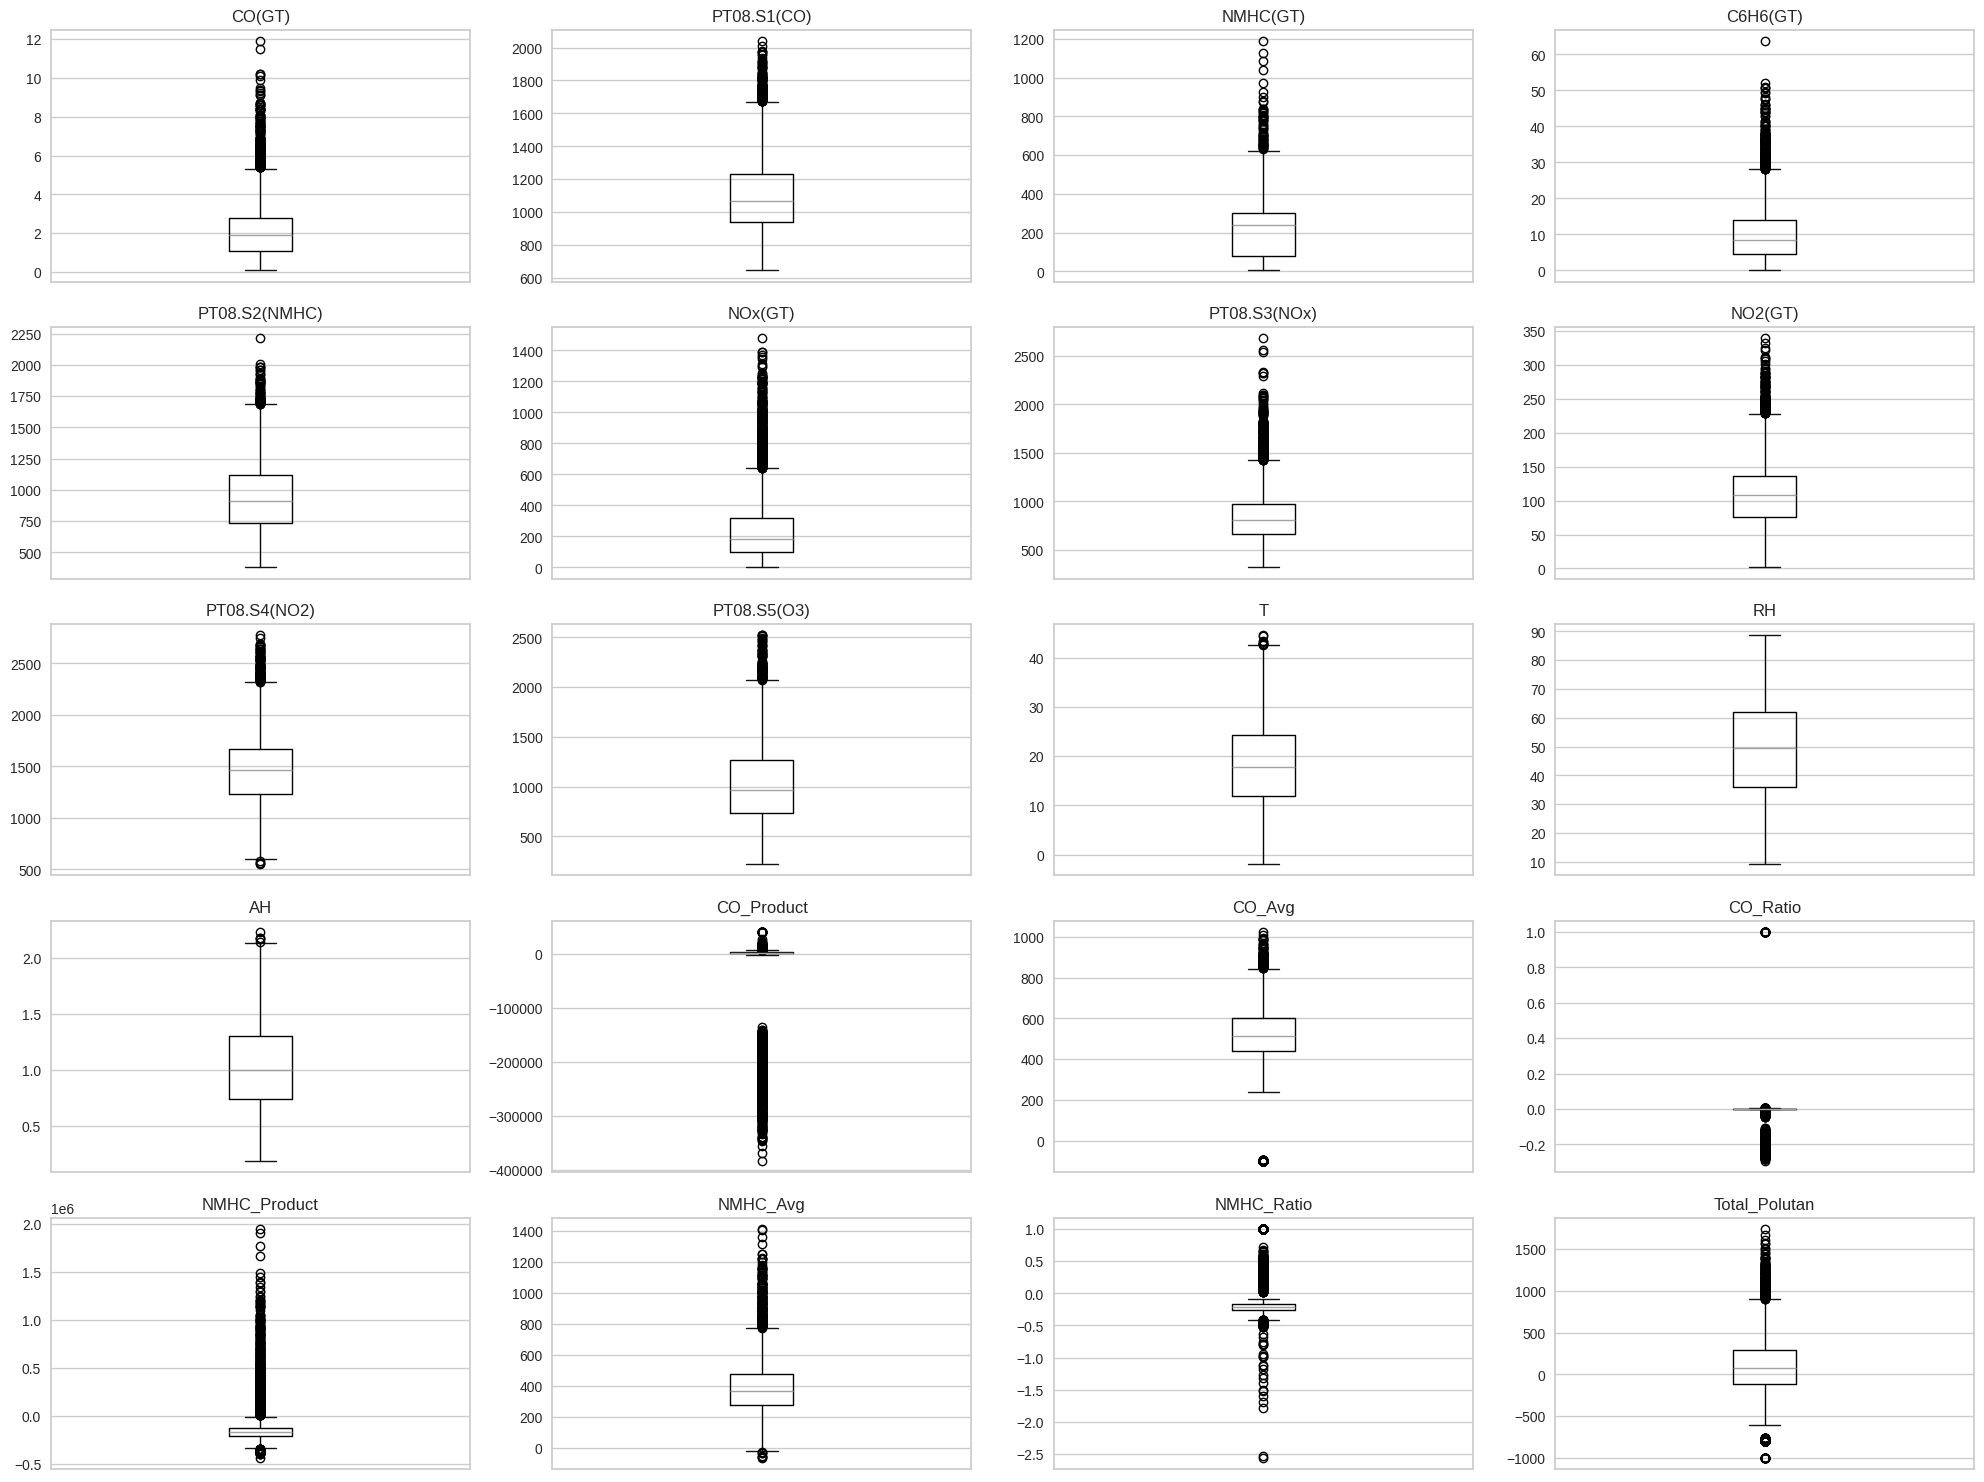

In [572]:
float_features = df.select_dtypes(include='float')

num_features = len(float_features.columns)
num_cols = 4
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(float_features.columns):
    float_features.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xticks([])

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Data Encoding

In [573]:
# Binary Encoding for DayOfWeek
df['DayOfWeek_binary'] = df['DayOfWeek'].apply(lambda x: format(x, '03b'))

binary_columns = ['DayOfWeek_bit0', 'DayOfWeek_bit1', 'DayOfWeek_bit2']
df[binary_columns] = df['DayOfWeek_binary'].apply(lambda x: pd.Series(list(x))).astype(int)

df.drop(['DayOfWeek_binary'], axis=1, inplace=True)
df.drop(['DayOfWeek'], axis=1, inplace=True)

df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,CO_Product,CO_Avg,CO_Ratio,NMHC_Product,NMHC_Avg,NMHC_Ratio,Total_Polutan,Datetime,Year,Month,Day,Hour,IsWeekend,DayOfWeek_bit0,DayOfWeek_bit1,DayOfWeek_bit2
0,2004-03-10,18:00:00,2.600,1360.000,150.000,11.900,1046.000,166.000,1056.000,113.000,1692.000,1268.000,13.600,48.900,0.758,3536.000,681.300,0.002,156900.000,598.000,0.143,443.500,2004-03-10 18:00:00,2004,3,10,18,0,0,1,0
1,2004-03-10,19:00:00,2.000,1292.000,112.000,9.400,955.000,103.000,1174.000,92.000,1559.000,972.000,13.300,47.700,0.726,2584.000,647.000,0.002,106960.000,533.500,0.117,318.400,2004-03-10 19:00:00,2004,3,10,19,0,0,1,0
2,2004-03-10,20:00:00,2.200,1402.000,88.000,9.000,939.000,131.000,1140.000,114.000,1555.000,1074.000,11.900,54.000,0.750,3084.400,702.100,0.002,82632.000,513.500,0.094,344.200,2004-03-10 20:00:00,2004,3,10,20,0,0,1,0
3,2004-03-10,21:00:00,2.200,1376.000,80.000,9.200,948.000,172.000,1092.000,122.000,1584.000,1203.000,11.000,60.000,0.787,3027.200,689.100,0.002,75840.000,514.000,0.084,385.400,2004-03-10 21:00:00,2004,3,10,21,0,0,1,0
4,2004-03-10,22:00:00,1.600,1272.000,51.000,6.500,836.000,131.000,1205.000,116.000,1490.000,1110.000,11.200,59.600,0.789,2035.200,636.800,0.001,42636.000,443.500,0.061,306.100,2004-03-10 22:00:00,2004,3,10,22,0,0,1,0


In [574]:
# Label Encoding for Time
le = LabelEncoder()
df['Time'] = le.fit_transform(df['Time'])

In [575]:
# Cyclic Encoding for Hour & Month
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)

df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

## Data Binning

In [576]:
# Binning for CO(GT)
bins_co = [0, 2, 5, 12]
labels_co = ['Low', 'Medium', 'High']
df['CO_Category'] = pd.cut(df['CO(GT)'], bins=bins_co, labels=labels_co)

# Binning for T (Temperature)
df['Temperature_Category'] = pd.qcut(df['T'], q=3, labels=['Cold', 'Moderate', 'Hot'])

# Binning for NO2(GT)
bins_no2 = [0, 100, 200, 340]
labels_no2 = ['Low', 'Medium', 'High']
df['NO2_Category'] = pd.cut(df['NO2(GT)'], bins=bins_no2, labels=labels_no2)

# Binning for Hour (Time of Day)
def categorize_hour(hour):
    if hour < 6:
        return 'Night'
    elif hour < 12:
        return 'Morning'
    elif hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df['Time_of_Day'] = df['Hour'].apply(lambda x: categorize_hour(x))

# Binning for C6H6(GT)
bins_c6h6 = [0, 10, 30, 64]
labels_c6h6 = ['Low', 'Medium', 'High']
df['C6H6_Category'] = pd.cut(df['C6H6(GT)'], bins=bins_c6h6, labels=labels_c6h6)

df[['CO_Category', 'Temperature_Category', 'NO2_Category', 'Time_of_Day', 'C6H6_Category']].sample(5)

,CO_Category,Temperature_Category,NO2_Category,Time_of_Day,C6H6_Category
1683,Low,Moderate,Medium,Evening,Low
7155,Medium,Cold,Medium,Evening,Medium
7282,Low,Cold,Low,Night,Low
2654,High,Hot,Medium,Morning,High
7573,Low,Cold,Medium,Morning,Low


In [577]:
df['Time_of_Day'].value_counts()

,count
Time_of_Day,
Evening,2340
Night,2340
Morning,2340
Afternoon,2337


In [578]:
# Label encoding for each binned column
label_cols = ['CO_Category', 'Temperature_Category', 'NO2_Category', 'Time_of_Day', 'C6H6_Category']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])

df[['CO_Category', 'Temperature_Category', 'NO2_Category', 'Time_of_Day', 'C6H6_Category']].sample(5)

,CO_Category,Temperature_Category,NO2_Category,Time_of_Day,C6H6_Category
3325,1,1,2,2,1
4147,2,1,2,0,1
5728,2,2,2,2,2
8090,0,2,0,1,2
7264,2,0,2,2,1


In [579]:
columns_to_drop = ['Datetime', 'Date', 'Time', 'Month', 'Hour']
df.drop(columns=columns_to_drop, inplace=True)

df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,CO_Product,CO_Avg,CO_Ratio,NMHC_Product,NMHC_Avg,NMHC_Ratio,Total_Polutan,Year,Day,IsWeekend,DayOfWeek_bit0,DayOfWeek_bit1,DayOfWeek_bit2,Hour_sin,Hour_cos,Month_sin,Month_cos,CO_Category,Temperature_Category,NO2_Category,Time_of_Day,C6H6_Category
count,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000
mean,2.113,1100.677,221.968,10.133,940.735,240.273,834.944,110.882,1455.857,1025.052,18.334,49.107,1.024,-34816.319,509.721,-0.030,-137052.864,389.640,-0.148,35.324,2004.240,15.877,0.287,0.431,0.429,0.428,0.000,0.000,0.058,-0.007,1.365,0.997,1.485,1.500,1.371
std,1.389,215.017,135.482,7.414,265.275,199.909,253.466,46.325,341.806,395.963,8.732,17.140,0.398,82978.597,165.826,0.100,171180.822,158.691,0.273,451.206,0.427,8.809,0.453,0.495,0.495,0.495,0.707,0.707,0.724,0.687,0.557,0.817,0.577,1.118,0.522
min,0.100,647.000,7.000,0.100,383.000,2.000,322.000,2.000,551.000,221.000,-1.900,9.200,0.185,-383000.000,-99.850,-0.294,-442800.000,-67.000,-2.560,-1000.000,2004.000,1.000,0.000,0.000,0.000,0.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,0.000,0.000,0.000
25%,1.100,939.000,82.051,4.500,736.000,101.000,664.000,76.078,1235.000,737.000,12.000,36.000,0.742,397.000,439.850,0.001,-215000.000,277.000,-0.262,-116.600,2004.000,8.000,0.000,0.000,0.000,0.000,-0.707,-0.707,-0.500,-0.500,1.000,0.000,1.000,1.000,1.000
50%,1.892,1067.000,237.396,8.400,914.000,186.000,805.000,108.396,1463.000,969.000,17.800,49.400,1.001,1415.400,513.200,0.001,-170800.000,367.339,-0.208,74.200,2004.000,16.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,2.000,2.000,1.000
75%,2.800,1231.000,299.000,14.000,1116.000,317.000,968.000,137.000,1669.000,1270.000,24.200,61.900,1.300,2958.800,601.500,0.002,-129400.000,476.000,-0.161,292.700,2004.000,23.000,1.000,1.000,1.000,1.000,0.707,0.707,0.866,0.500,2.000,2.000,2.000,3.000,2.000
max,11.900,2040.000,1189.000,63.700,2214.000,1479.000,2683.000,340.000,2775.000,2523.000,44.600,88.700,2.231,40000.000,1024.000,1.000,1946393.000,1413.000,1.000,1739.000,2005.000,31.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,2.000,2.000,2.000,3.000,2.000


In [580]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CO(GT)                9357 non-null   float64
 1   PT08.S1(CO)           9357 non-null   float64
 2   NMHC(GT)              9357 non-null   float64
 3   C6H6(GT)              9357 non-null   float64
 4   PT08.S2(NMHC)         9357 non-null   float64
 5   NOx(GT)               9357 non-null   float64
 6   PT08.S3(NOx)          9357 non-null   float64
 7   NO2(GT)               9357 non-null   float64
 8   PT08.S4(NO2)          9357 non-null   float64
 9   PT08.S5(O3)           9357 non-null   float64
 10  T                     9357 non-null   float64
 11  RH                    9357 non-null   float64
 12  AH                    9357 non-null   float64
 13  CO_Product            9357 non-null   float64
 14  CO_Avg                9357 non-null   float64
 15  CO_Ratio              9357

## Standardize Features

In [581]:
df_scaled = df.copy()

X = df_scaled.select_dtypes(include=['float64', 'int64']).columns
exclude_columns = ['IsWeekend', 'DayOfWeek_bit0', 'DayOfWeek_bit1', 'DayOfWeek_bit2', 'CO_Category', 'Temperature_Category', 'C6H6_Category']
X = [col for col in X if col not in exclude_columns]

scaler = StandardScaler()

df_scaled[X] = scaler.fit_transform(df_scaled[X])

df_scaled[X].head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,CO_Product,CO_Avg,CO_Ratio,NMHC_Product,NMHC_Avg,NMHC_Ratio,Total_Polutan,Hour_sin,Hour_cos,Month_sin,Month_cos,NO2_Category,Time_of_Day
0,0.351,1.206,-0.531,0.238,0.397,-0.372,0.872,0.046,0.691,0.614,-0.542,-0.012,-0.668,0.462,1.035,0.318,1.717,1.313,1.069,0.905,-1.415,-0.000,1.302,0.010,0.893,-0.448
1,-0.081,0.890,-0.812,-0.099,0.054,-0.687,1.338,-0.408,0.302,-0.134,-0.577,-0.082,-0.749,0.451,0.828,0.314,1.426,0.907,0.973,0.627,-1.367,0.366,1.302,0.010,-0.841,-0.448
2,0.063,1.401,-0.989,-0.153,-0.007,-0.547,1.204,0.067,0.290,0.124,-0.737,0.285,-0.687,0.457,1.160,0.314,1.283,0.781,0.887,0.685,-1.225,0.707,1.302,0.010,0.893,-0.448
3,0.063,1.281,-1.048,-0.126,0.027,-0.342,1.014,0.240,0.375,0.449,-0.840,0.636,-0.595,0.456,1.082,0.315,1.244,0.784,0.853,0.776,-1.000,1.000,1.302,0.010,0.893,-0.448
4,-0.369,0.797,-1.262,-0.490,-0.395,-0.547,1.460,0.110,0.100,0.215,-0.817,0.612,-0.590,0.444,0.766,0.311,1.050,0.339,0.767,0.600,-0.708,1.224,1.302,0.010,0.893,-0.448


In [582]:
df_scaled.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,CO_Product,CO_Avg,CO_Ratio,NMHC_Product,NMHC_Avg,NMHC_Ratio,Total_Polutan,Year,Day,IsWeekend,DayOfWeek_bit0,DayOfWeek_bit1,DayOfWeek_bit2,Hour_sin,Hour_cos,Month_sin,Month_cos,CO_Category,Temperature_Category,NO2_Category,Time_of_Day,C6H6_Category
count,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000
mean,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,2004.240,15.877,0.287,0.431,0.429,0.428,-0.000,-0.000,0.000,0.000,1.365,0.997,-0.000,-0.000,1.371
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.427,8.809,0.453,0.495,0.495,0.495,1.000,1.000,1.000,1.000,0.557,0.817,1.000,1.000,0.522
min,-1.449,-2.110,-1.587,-1.353,-2.103,-1.192,-2.024,-2.351,-2.647,-2.031,-2.317,-2.328,-2.107,-4.196,-3.676,-2.639,-1.786,-2.878,-8.837,-2.295,2004.000,1.000,0.000,0.000,0.000,0.000,-1.415,-1.414,-1.460,-1.445,0.000,0.000,-2.576,-1.342,0.000
25%,-0.729,-0.752,-1.033,-0.760,-0.772,-0.697,-0.674,-0.751,-0.646,-0.728,-0.725,-0.765,-0.708,0.424,-0.421,0.304,-0.455,-0.710,-0.417,-0.337,2004.000,8.000,0.000,0.000,0.000,0.000,-1.000,-1.000,-0.770,-0.718,1.000,0.000,-0.841,-0.448,1.000
50%,-0.159,-0.157,0.114,-0.234,-0.101,-0.272,-0.118,-0.054,0.021,-0.142,-0.061,0.017,-0.057,0.437,0.021,0.312,-0.197,-0.141,-0.220,0.086,2004.000,16.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.079,0.010,1.000,1.000,0.893,0.447,1.000
75%,0.495,0.606,0.569,0.522,0.661,0.384,0.525,0.564,0.624,0.619,0.672,0.746,0.695,0.455,0.553,0.320,0.045,0.544,-0.047,0.570,2004.000,23.000,1.000,1.000,1.000,1.000,1.000,1.000,1.117,0.738,2.000,2.000,0.893,1.341,2.000
max,7.046,4.369,7.138,7.225,4.800,6.197,7.292,4.946,3.860,3.783,3.008,2.310,3.033,0.902,3.101,10.301,12.172,6.449,4.208,3.776,2005.000,31.000,1.000,1.000,1.000,1.000,1.414,1.414,1.302,1.465,2.000,2.000,0.893,1.341,2.000


## PCA

Explained Variance Ratio by Principal Components:
[0.73243509 0.08877611]


Text(0.5, 1.0, 'PCA Result')

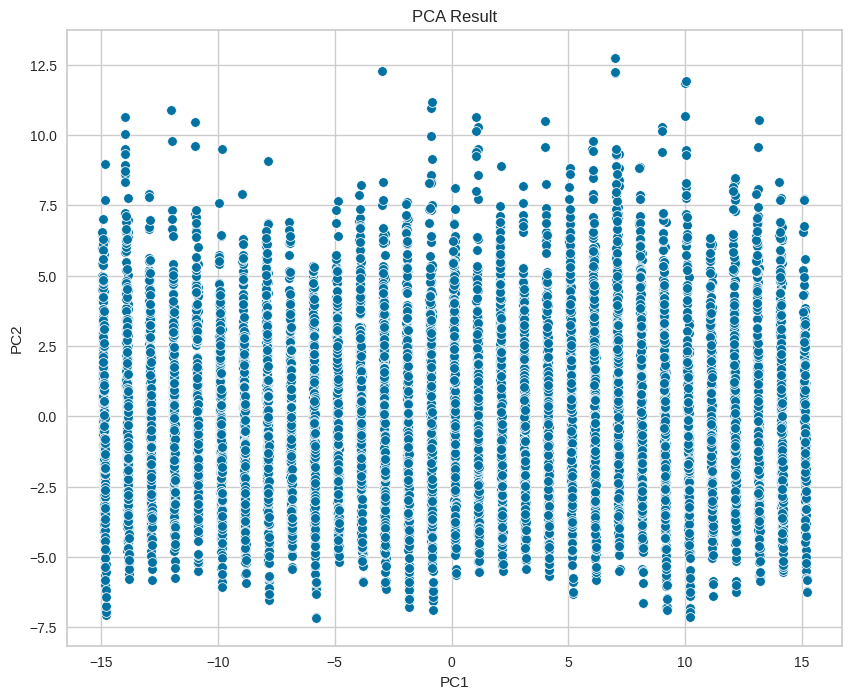

In [583]:
# Initialize PCA for 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame for the principal components
x_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Display the explained variance ratio
print('Explained Variance Ratio by Principal Components:')
print(pca.explained_variance_ratio_)

# visualize pca
plt.figure(figsize=(10, 8))
sns.scatterplot(data=x_pca, x='PC1', y='PC2')
plt.title('PCA Result')

# **6. Clustering Model Building**

## **Clustering Model Building & Evaluation**

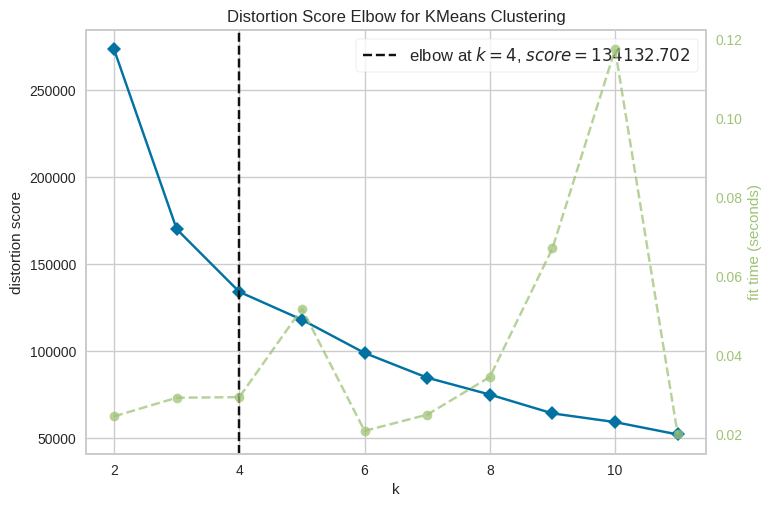

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [584]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=11)

visualizer.fit(x_pca)
visualizer.show()

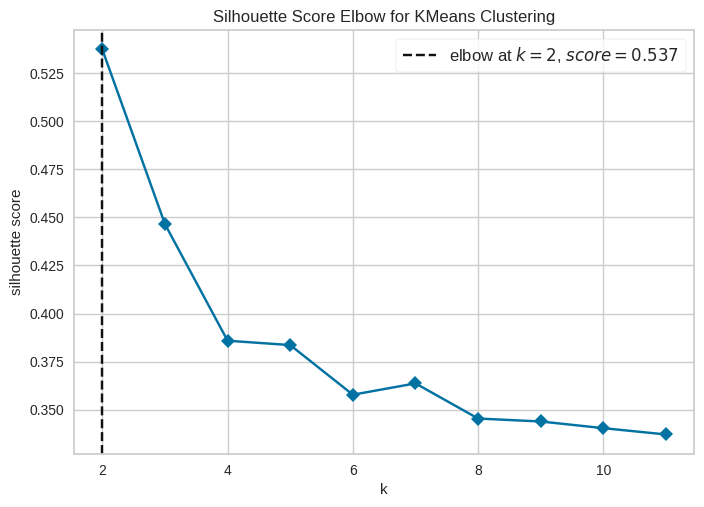

In [585]:
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=11, metric='silhouette', timings=False)

visualizer.fit(x_pca)
visualizer.show()

optimal_k = visualizer.elbow_value_
best_score_k = visualizer.elbow_score_

In [586]:
def dbscan_silhouette_analysis(x_pca, eps_values, min_samples=5):
    silhouette_scores = []
    num_clusters_list = []

    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(x_pca)

        # Compute the number of clusters
        num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        num_clusters_list.append(num_clusters)

        # Compute silhouette score if there are more than one cluster
        if num_clusters > 1:
            sil_score = silhouette_score(x_pca, dbscan_labels)
            silhouette_scores.append(sil_score)
        else:
            silhouette_scores.append(None)  # Add None if silhouette score cannot be calculated

    # Filter valid silhouette scores
    valid_scores = [(eps, score) for eps, score in zip(eps_values, silhouette_scores) if score is not None]
    best_eps, best_score = None, None
    if valid_scores:
        best_eps, best_score = max(valid_scores, key=lambda x: x[1])

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(
        eps_values,
        [s if s is not None else 0 for s in silhouette_scores],
        marker='o', label="Silhouette Score"
    )
    plt.xticks(eps_values)
    plt.xlabel("eps (DBSCAN parameter)")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Score for DBSCAN Clustering")

    # Only draw the vertical line if best_eps is not None
    if best_eps is not None:
        plt.axvline(x=best_eps, linestyle='--', color='black',
                    label=f"Best eps = {best_eps}, score = {best_score:.3f}")

    plt.legend()
    plt.grid(True)
    plt.show()

    return best_eps, best_score, silhouette_scores

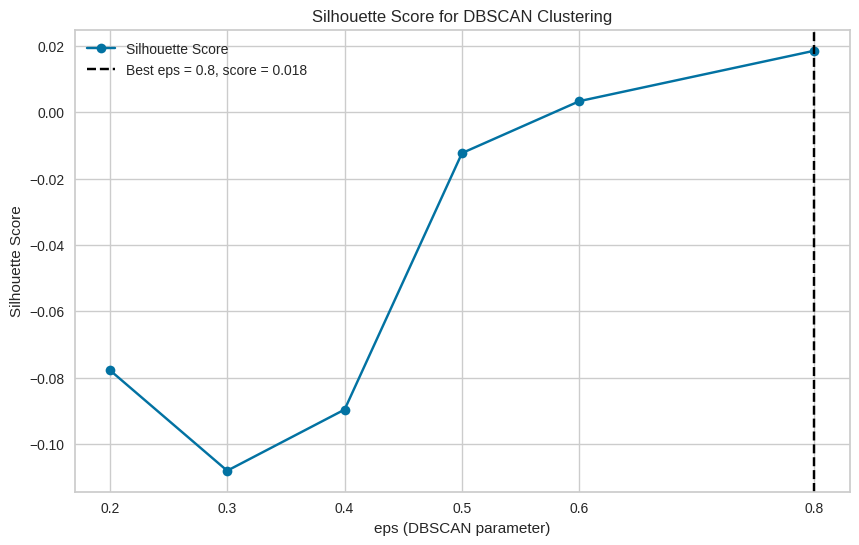

In [587]:
eps_values = [0.2, 0.3, 0.4, 0.5, 0.6, 0.8]

best_eps, best_score, silhouette_scores = dbscan_silhouette_analysis(x_pca, eps_values)

## **Feature Selection**

In [588]:
selected_features = ['NMHC_Ratio', 'NMHC_Product', 'CO_Ratio', 'CO_Product', 'Total_Polutan']
x = df_scaled[selected_features]

Explained Variance Ratio by Principal Components:
[0.48926818 0.26600465]


Text(0.5, 1.0, 'PCA Result')

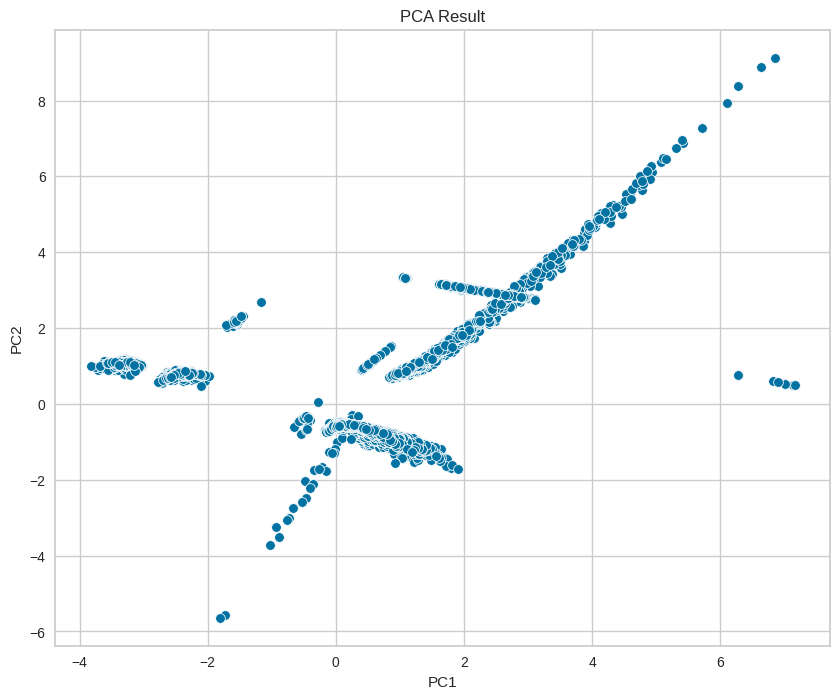

In [589]:
principal_components = pca.fit_transform(x)
x_pca1 = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

print('Explained Variance Ratio by Principal Components:')
print(pca.explained_variance_ratio_)

# visualize pca
plt.figure(figsize=(10, 8))
sns.scatterplot(data=x_pca1, x='PC1', y='PC2')
plt.title('PCA Result')

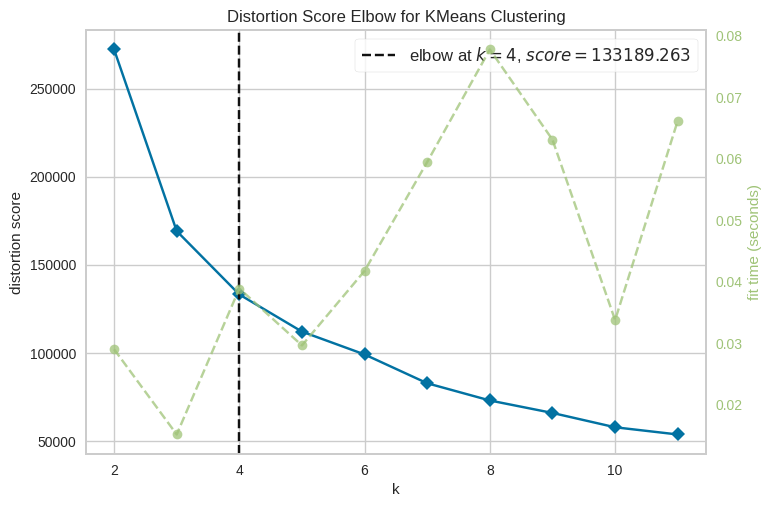

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [590]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=11)

visualizer.fit(x_pca)
visualizer.show()

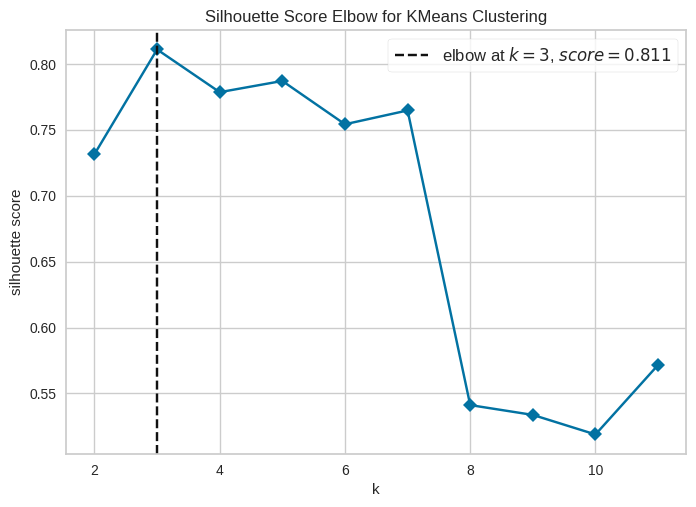

In [591]:
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=11, metric='silhouette', timings=False)

visualizer.fit(x_pca1)
visualizer.show()

optimal_k1 = visualizer.elbow_value_
best_score_k1 = visualizer.elbow_score_

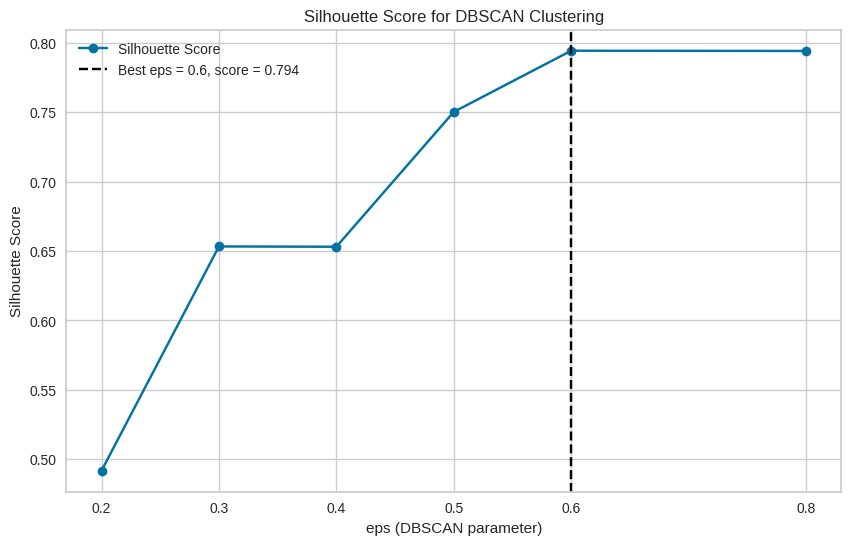

In [592]:
eps_values = [0.2, 0.3, 0.4, 0.5, 0.6, 0.8]

best_eps, best_score, silhouette_scores = dbscan_silhouette_analysis(x_pca1, eps_values)

## **Cluster Visualization & Analysis**

### Before Feature Selection

In [606]:
dbscan = DBSCAN(eps=0.8, min_samples=5)
clusters = dbscan.fit_predict(x_pca)

X_dbscan = x_pca.copy()
X_dbscan['Cluster'] = clusters
X_dbscan['Cluster'].value_counts()

,count
Cluster,
13,312
4,312
10,311
7,311
2,311
24,311
25,311
1,310
16,310


**DBSCAN RESULT:**

The clusters formed are unrepresentative (too many cluster), thus providing no meaningful insight into the patterns/clustering in the data.

In [594]:
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(x_pca)

X_kmeans = x_pca.copy()
X_kmeans['Cluster'] = clusters
X_kmeans['Cluster'].value_counts()

,count
Cluster,
1,4824
0,4533


**K-MEANS RESULT**:

From the clustering results using K-Means with k=2 (n_clusters=2), we see better results than the previous DBSCAN

The cluster distribution is more balanced

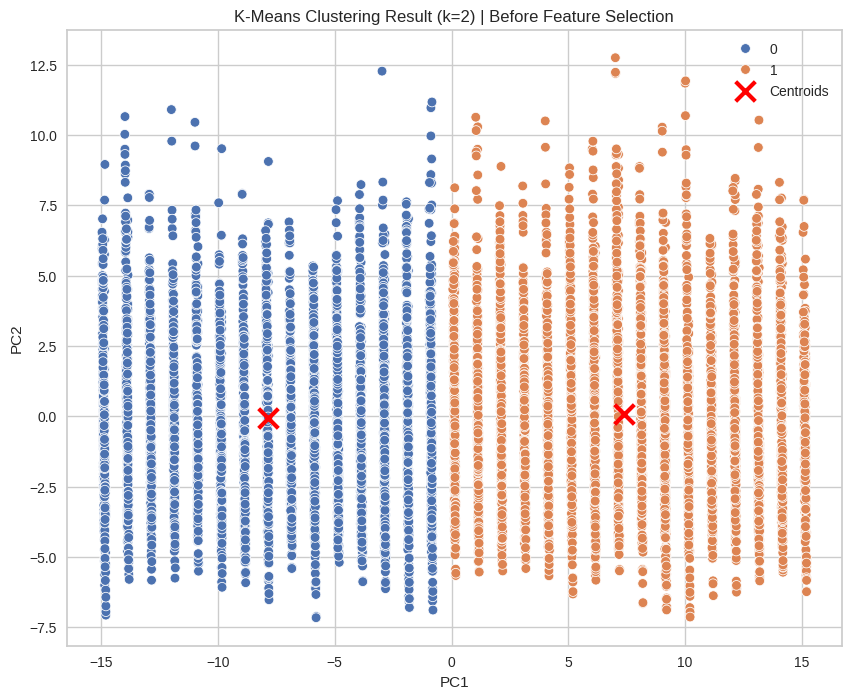

In [595]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=X_kmeans, x='PC1', y='PC2', hue='Cluster', palette='deep')
plt.title('K-Means Clustering Result (k=2) | Before Feature Selection')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.legend()
plt.grid(True)
plt.show()

In [596]:
print(f"Optimal k: {optimal_k}")
print(f"Best silhouette score: {best_score_k}")

Optimal k: 2
Best silhouette score: 0.5373234622126103


**NOTE:**

The silhouette score from the KMeans clustering is 0.54, which is below 0.55. This indicates poor cluster separation.

### After Feature Selection

In [597]:
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(x_pca1)

X_kmeans1 = x_pca1.copy()
X_kmeans1['Cluster'] = clusters
X_kmeans1['Cluster'].value_counts()

,count
Cluster,
0,7710
1,1647


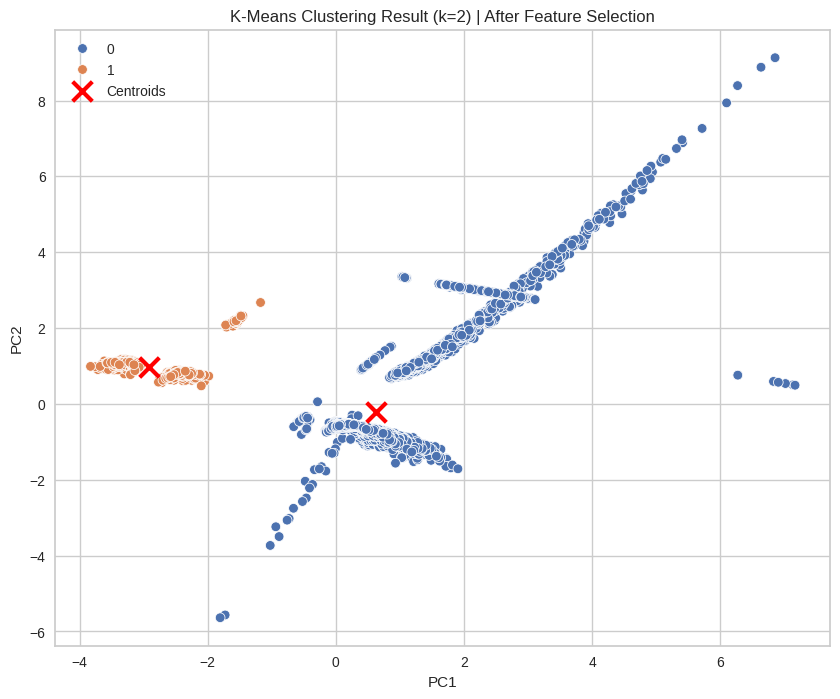

In [598]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=X_kmeans1, x='PC1', y='PC2', hue='Cluster', palette='deep')
plt.title('K-Means Clustering Result (k=2) | After Feature Selection')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.legend()
plt.grid(True)
plt.show()

In [599]:
print(f"Optimal k: {optimal_k1}")
print(f"Best silhouette score: {best_score_k1}")

Optimal k: 3
Best silhouette score: 0.8109608946859179


**INSIGHT:**

The silhoutte score of the clustering after feature selection is 0.81. Which is where the score results are above 0.55 which indicates a fairly good cluster separation.

## **Interpretation of Cluster Results**

1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Exporting Data**

In [600]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CO(GT)                9357 non-null   float64
 1   PT08.S1(CO)           9357 non-null   float64
 2   NMHC(GT)              9357 non-null   float64
 3   C6H6(GT)              9357 non-null   float64
 4   PT08.S2(NMHC)         9357 non-null   float64
 5   NOx(GT)               9357 non-null   float64
 6   PT08.S3(NOx)          9357 non-null   float64
 7   NO2(GT)               9357 non-null   float64
 8   PT08.S4(NO2)          9357 non-null   float64
 9   PT08.S5(O3)           9357 non-null   float64
 10  T                     9357 non-null   float64
 11  RH                    9357 non-null   float64
 12  AH                    9357 non-null   float64
 13  CO_Product            9357 non-null   float64
 14  CO_Avg                9357 non-null   float64
 15  CO_Ratio              9357

In [601]:
df['Cluster'] = X_kmeans1['Cluster'].values

In [602]:
df['Cluster'].value_counts()

,count
Cluster,
0,7710
1,1647


In [603]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,CO_Product,CO_Avg,CO_Ratio,NMHC_Product,NMHC_Avg,NMHC_Ratio,Total_Polutan,Year,Day,IsWeekend,DayOfWeek_bit0,DayOfWeek_bit1,DayOfWeek_bit2,Hour_sin,Hour_cos,Month_sin,Month_cos,CO_Category,Temperature_Category,NO2_Category,Time_of_Day,C6H6_Category,Cluster
count,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000
mean,2.113,1100.677,221.968,10.133,940.735,240.273,834.944,110.882,1455.857,1025.052,18.334,49.107,1.024,-34816.319,509.721,-0.030,-137052.864,389.640,-0.148,35.324,2004.240,15.877,0.287,0.431,0.429,0.428,0.000,0.000,0.058,-0.007,1.365,0.997,1.485,1.500,1.371,0.176
std,1.389,215.017,135.482,7.414,265.275,199.909,253.466,46.325,341.806,395.963,8.732,17.140,0.398,82978.597,165.826,0.100,171180.822,158.691,0.273,451.206,0.427,8.809,0.453,0.495,0.495,0.495,0.707,0.707,0.724,0.687,0.557,0.817,0.577,1.118,0.522,0.381
min,0.100,647.000,7.000,0.100,383.000,2.000,322.000,2.000,551.000,221.000,-1.900,9.200,0.185,-383000.000,-99.850,-0.294,-442800.000,-67.000,-2.560,-1000.000,2004.000,1.000,0.000,0.000,0.000,0.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.100,939.000,82.051,4.500,736.000,101.000,664.000,76.078,1235.000,737.000,12.000,36.000,0.742,397.000,439.850,0.001,-215000.000,277.000,-0.262,-116.600,2004.000,8.000,0.000,0.000,0.000,0.000,-0.707,-0.707,-0.500,-0.500,1.000,0.000,1.000,1.000,1.000,0.000
50%,1.892,1067.000,237.396,8.400,914.000,186.000,805.000,108.396,1463.000,969.000,17.800,49.400,1.001,1415.400,513.200,0.001,-170800.000,367.339,-0.208,74.200,2004.000,16.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,2.000,2.000,1.000,0.000
75%,2.800,1231.000,299.000,14.000,1116.000,317.000,968.000,137.000,1669.000,1270.000,24.200,61.900,1.300,2958.800,601.500,0.002,-129400.000,476.000,-0.161,292.700,2004.000,23.000,1.000,1.000,1.000,1.000,0.707,0.707,0.866,0.500,2.000,2.000,2.000,3.000,2.000,0.000
max,11.900,2040.000,1189.000,63.700,2214.000,1479.000,2683.000,340.000,2775.000,2523.000,44.600,88.700,2.231,40000.000,1024.000,1.000,1946393.000,1413.000,1.000,1739.000,2005.000,31.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,2.000,2.000,2.000,3.000,2.000,1.000


In [605]:
# Export
df.to_csv('/content/drive/MyDrive/Colab Notebooks/df_cluster.csv', index=False)